> **What You’ll Learn in This Notebook**
> - How a real-world object detection dataset is structured  
> - How to fine-tune a pre-trained YOLO model  
> - How to evaluate and visualize predictions  
> - How this pipeline translates to industry use-cases


> 🔴 **Important**
>  
> Object detection models like YOLO are computationally heavy.  
> Training **without a GPU** will be extremely slow and may crash your runtime.
>  
> 👉 Always verify that **CUDA is enabled** before proceeding.


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))


CUDA Available: True
GPU: Tesla T4


In [ ]:
!pip install -q ultralytics roboflow opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 129.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


> 📂 **Dataset Structure Explained**
>  
> YOLO expects images and labels to be stored separately:
> - `images/` → actual images  
> - `labels/` → text files containing bounding box coordinates  
>  
> Each image **must** have a corresponding label file with the same name.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Yv4wGxs6ZjAKJ8EsaQDM")
project = rf.workspace("smartathon").project("new-pothole-detection")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to New-pothole-detection-2 in yolov8:: 100%|██████████| 18492/18492 [00:04<00:00, 3764.23it/s]


> 🏷️ **YOLO Annotation Format**
>  
> Each line in a label file looks like this:
>  
> `class_id x_center y_center width height`
>  
> ✔ All values are **normalized (0–1)**  
> ❌ Pixel values will break training


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

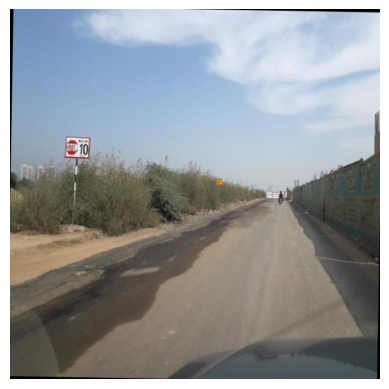

In [ ]:
img_path = "/content/New-pothole-detection-2/train/images"
sample_img = os.listdir(img_path)[0]

img = cv2.imread(os.path.join(img_path, sample_img))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")


> ⚠️ **Common Mistake**
>  
> Training will silently fail or give poor results if:
> - Class names in `data.yaml` are wrong
> - `nc` does not match the number of classes
> - Labels are missing or corrupted


> 🧠 **Why Pretrained Models?**
>  
> We are **not training from scratch**.
>  
> YOLO models are pre-trained on large datasets (like COCO),  
> which allows them to learn general visual features such as:
> - edges
> - shapes
> - textures
>  
> Fine-tuning adapts these features to *your specific task*.


In [ ]:
model = YOLO("yolov8n.pt")  # nano model for fast training
model.train(
    data="/content/New-pothole-detection-2/data.yaml",
    epochs=5,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/New-pothole-detection-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de042053ce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

> 🚀 **What’s Happening Now**
>  
> During training, the model:
> - Learns to localize objects (bounding boxes)
> - Learns to classify objects (helmet / pothole / etc.)
> - Optimizes multiple losses simultaneously


> 📊 **What is mAP?**
>  
> Mean Average Precision (mAP) measures:
> - How well objects are detected
> - How accurate the bounding boxes are
>  
> `mAP@0.5` → Lenient  
> `mAP@0.5:0.95` → Strict (industry standard)


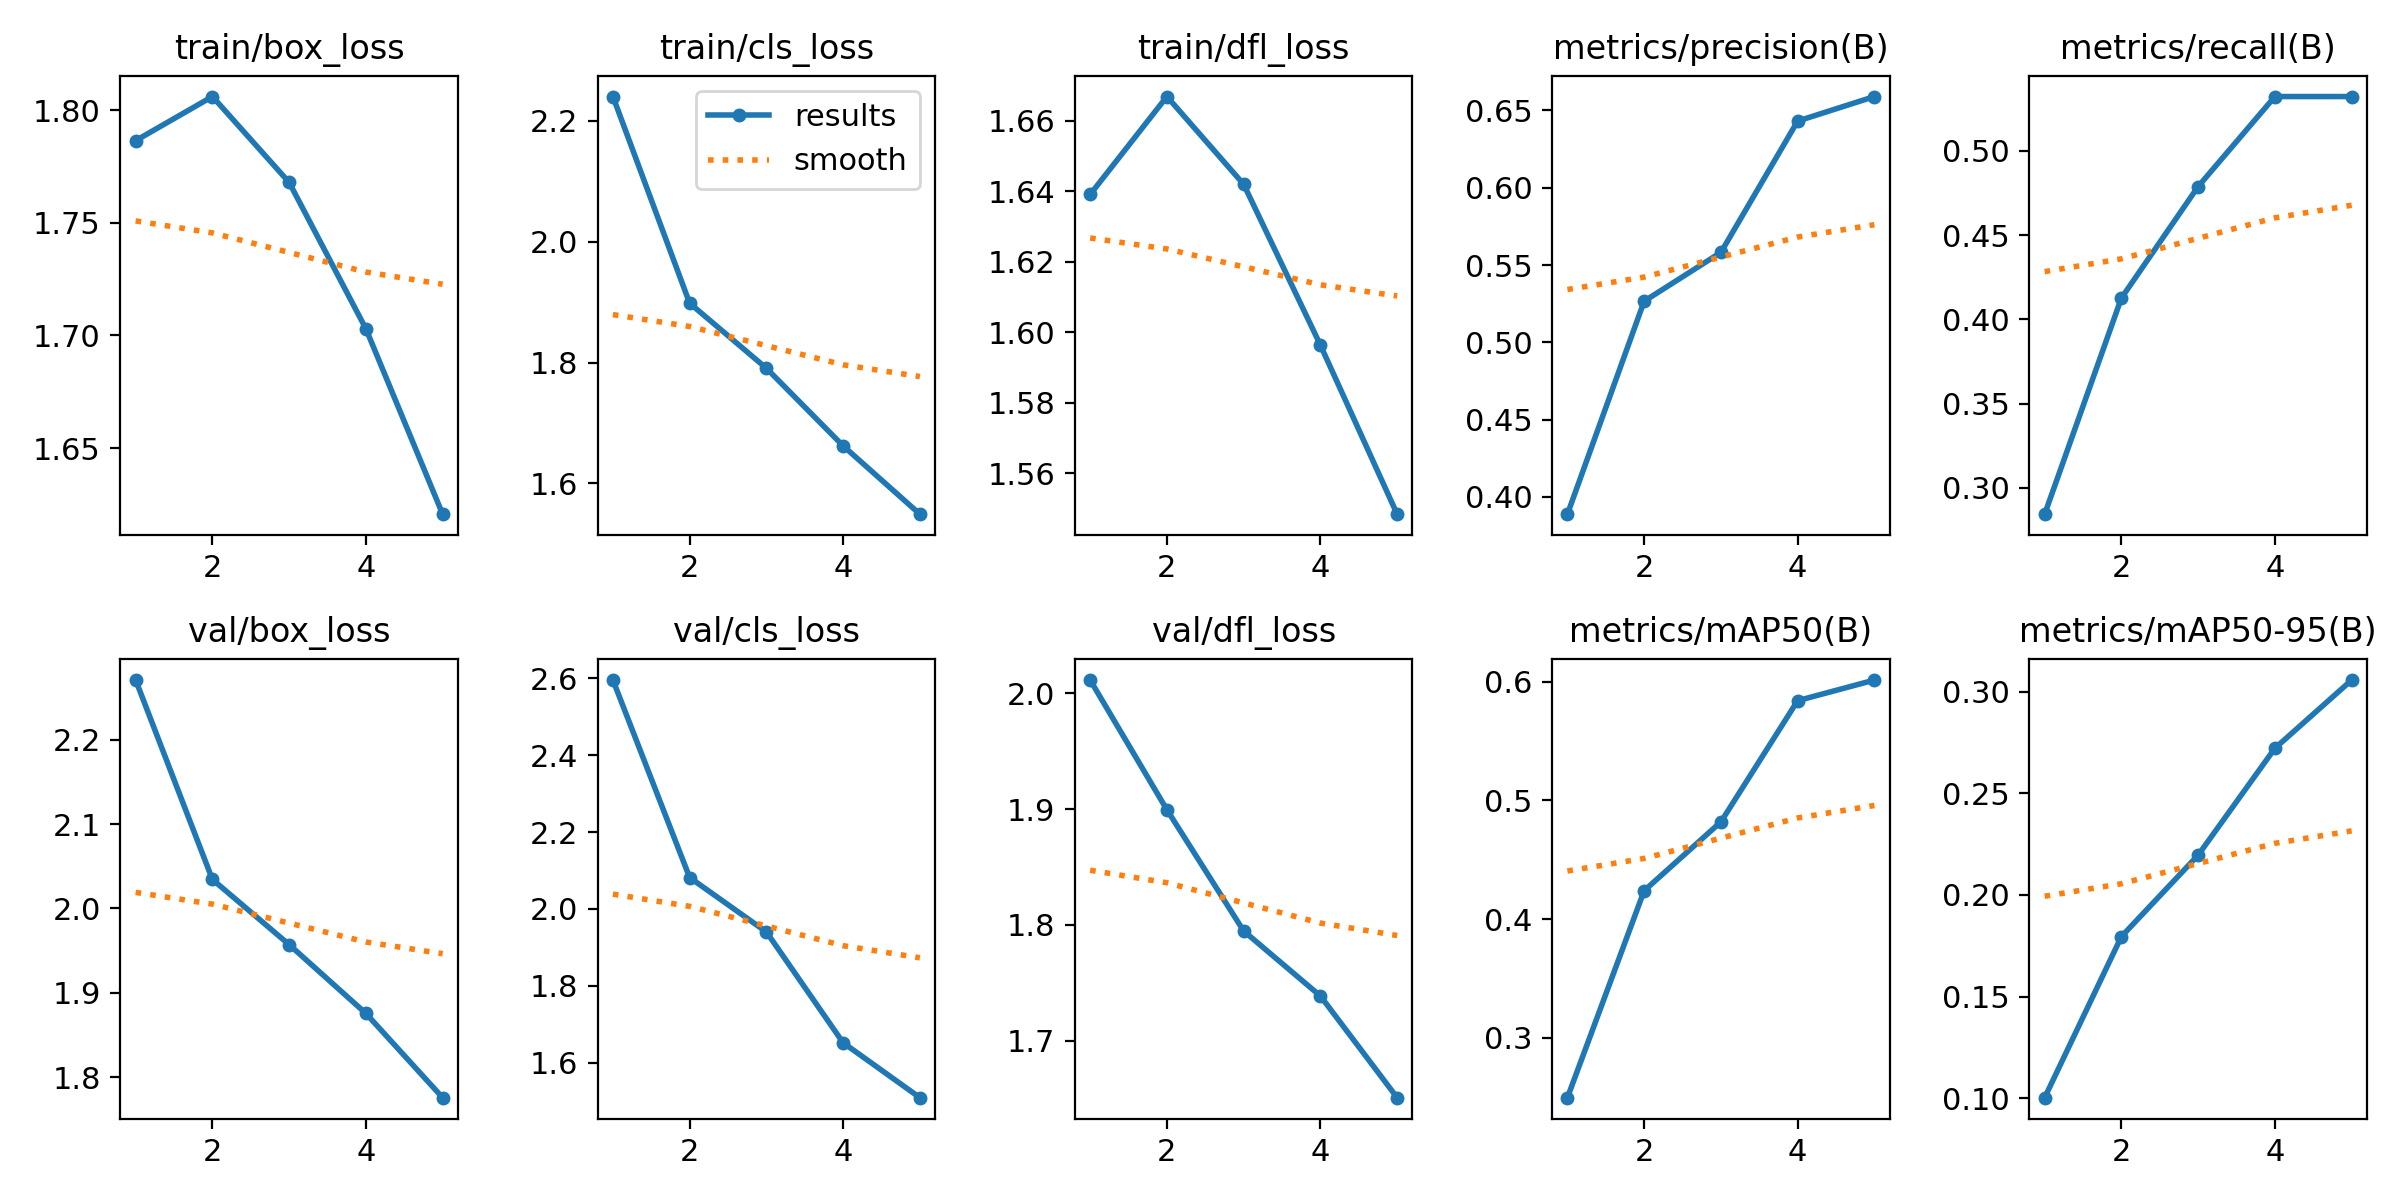

In [ ]:
from IPython.display import Image
Image(filename="/content/runs/detect/train/results.png")


> 🎯 **Confidence Threshold Explained**
>  
> The `conf` parameter controls how confident the model must be  
> before showing a detection.
>  
> - Low value → more detections, more false positives  
> - High value → fewer detections, more precision



image 1/1 /content/New-pothole-detection-2/test/images/0040_jpg.rf.e2f36706cf838f5d200eb16a20c6cbfc.jpg: 640x640 1 Pothole, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict5


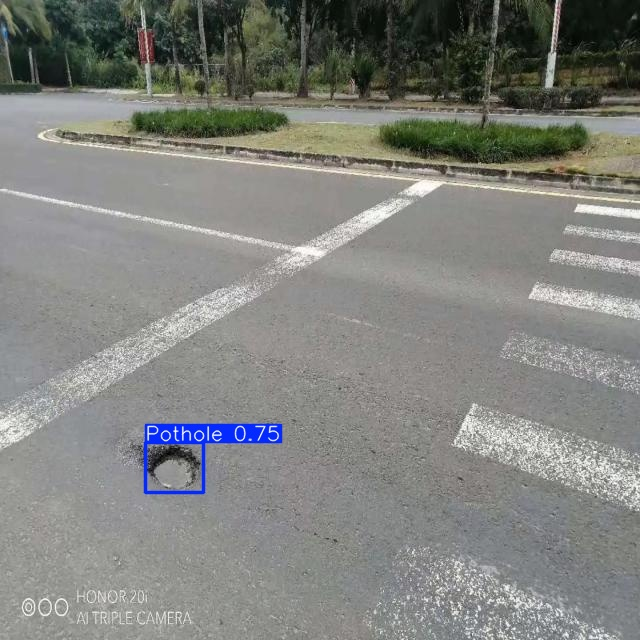

In [ ]:
from IPython.display import Image, display
import glob


model = YOLO("runs/detect/train/weights/best.pt")

model.predict(
    source="/content/New-pothole-detection-2/test/images/0040_jpg.rf.e2f36706cf838f5d200eb16a20c6cbfc.jpg",
    conf=0.6,
    save=True,
    nms=True,
)








pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

for img_path in glob.glob(f"{pred_dir}/*.jpg"):
    display(Image(filename=img_path))

